# A. La régression lineaire

# I. Introduction
## II. Régression lineaire simple
Soit un ensemble de points $ \{ (x_{i},y_{i}) \in R^{2}  i=1...n \}$.
Trouver une fonction $h$ telle que $$h(x_{i}) \approx y_{i} \forall i \in \{1 ... n\}$$

### Q1. Ecrire un script qui permet d'obtenir le nuage de point suivant:
Remarque: On remaque qu'il y a une correlation entre x et y dans cette figure.

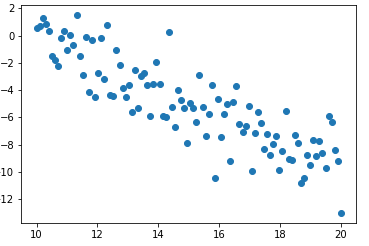

In [2]:
import numpy as np
import matplotlib.pyplot as plt

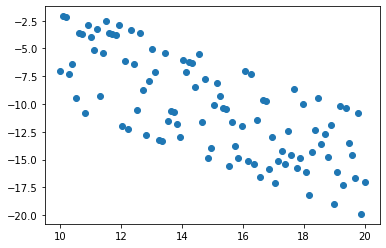

In [3]:
# Votre code ici
X = np.linspace(10, 20, 100)
Y = -1 * X + np.random.randint(10, size=(100))
plt.scatter(X, Y)
plt.show()



In [8]:
b = X[:3]
b = b * 2 + 3
b

array([23.       , 23.2020202, 23.4040404])

Q2. Soit $h(x)=w_{0}+ w_{1}x$. Sur la meme figure, tracez h(x) pour differentes valeurs des coeficients  $w_{0}$ et $w_{1}$ et calculez la valeur de la fonction objective (coût) suivante:
$$ J(w_{0},w_{1})=\frac{1}{2m}\sum_{i=0}^{m}(h(x_{i})-y_{i})^{2} $$

Que remarquez-vous?


In [256]:
#Votre code ici
def h(X, w0, w1):
    return w0 + (w1 * X)

def cost(X, Y, w0, w1):
    m = Y.size
    return round(1/2*m * np.sum(h(X, w0, w1) - Y)**2, 2)

In [257]:
def deferentsH(iteration):
    list_H = []
    nb = np.arange(0, X.shape[0])
    fig, ax = plt.subplots() 
    for e in range(iteration):
        w0 = np.random.randint(10)
        w1 = np.random.randint(10)
        list_H.append(h(X, w0, w1))
        ax.plot(nb, list_H[e], label='w0=' + str(w0) + '  w1=' + str(w1))
    ax.set_xlabel('x label') 
    ax.set_ylabel('H label') 
    ax.set_title("Testing deferent W0, W1")  
    ax.legend() 
    
    

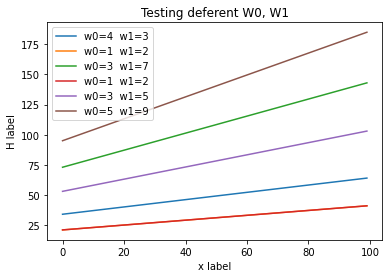

In [258]:
deferentsH(6)

Q3. Pour minimiser le coût $$ J(w_{0},w_{1})=\frac{1}{2m}\sum_{i=0}^{m}(h(x_{i})-y_{i})^{2} = \frac{1}{2m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i})^{2} $$
On utilise la methode de la descente du gradient. Il faut donc calculer la dérivée de $J(w_{0},w_{1})$ par rapport à $w_{0}$ et par rapport à $w_{1}$ nous avons alors:
$$ \frac{\delta J(w_{0},w_{1})}{\delta w_{0}}=\frac{1}{m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i}) $$

$$ \frac{\delta J(w_{0},w_{1})}{\delta w_{1}}=\frac{1}{m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i})x_{i} $$
A chaque itération, la mise à jour des coeficients sera comme suivant:
$$ w_{0}\leftarrow w_{0}- \alpha\frac{\delta J(w_{0},w_{1})}{\delta w_{0}}$$
$$ w_{1}\leftarrow w_{1}- \alpha\frac{\delta J(w_{0},w_{1})}{\delta w_{1}}$$

$\alpha$: learning rate

a. Ecrire un script pour cet algorithme.

b. Tracer l'evolution de ${J(w_{0},w_{1})}$ au cours des itération de la descente du gradient pour differentes valeur de $\alpha$.

c. Que remarquez-vous

d. Visulisez la solution obtenue

In [259]:
# votre code ici
def costOptemiser(iterations, alpha) :
    
    m = Y.size
    w0 = np.random.randint(20)
    w1 = np.random.randint(20)
    costList = []
    
    for e in range(iterations) :
        
        costList.append(cost(X, Y, w0, w1))
        w0 = w0 - (alpha * np.sum(h(X, w0, w1) - Y)) / m
        w1 = w1 - (alpha * np.sum((h(X, w0, w1) - Y) * X )) / m
        #print(f"iteration {e}    ===>    w0 = {w0}    --    w1 = {w1}")
    return costList


In [260]:
iterations_ = 100
ploting = np.arange(0, iterations_)


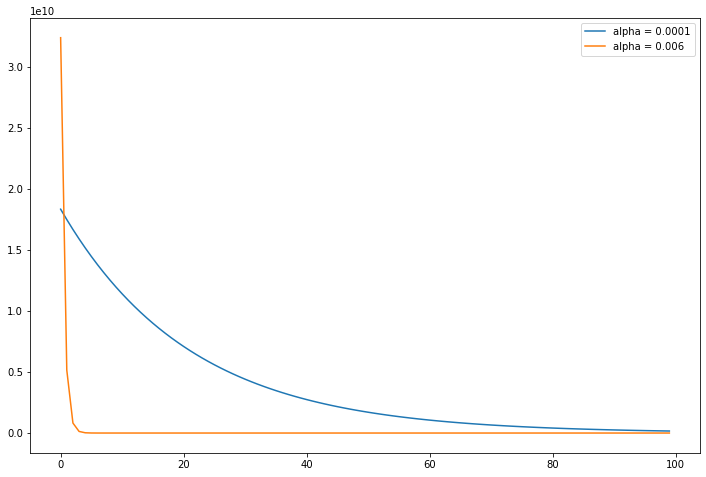

In [261]:
plt.figure(figsize=(12, 8))
#fig, ax = plt.subplots() 
plt.plot(ploting, costOptemiser(iterations_, 0.0001 ), label='alpha = ' + str(0.0001))
plt.plot(ploting, costOptemiser(iterations_, 0.006 ), label='alpha = ' + str(0.006))
 
plt.legend() 

Q4. Dans le cas d'une régression lineaire simple nous avons la solution directe suivante:
$$ w_{1}=\frac{\sum_{i=0}^{m}(x_{i}-\overline{x})(y_{i}-\overline{y})}{\sum_{i=0}^{m}(x_{i}-\overline{x})^2} $$

$$w_{0}=\overline{y}-w_{1}\overline{x}$$

Où $\overline{x}$ est la moyenne des éléments de x

a. Ecrire un script qui calcule les valeur de $w_{0}$ et $w_{1}$

b. Visualiser les resultats

In [264]:
#Votre code ici
w1 = np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum(X - X.mean())**2
w0 = Y.mean() - (w1 * X.mean())
#plt.figure(figsize=(12, 8))
#plt.scatter(X, Y, c='green')
#plt.plot(X, (w0 + X*w1), c='red')
#plt.show()


X.size

100

# III-Régression lineaire multiple
Dans ce cas $x=(x_{0}, x_{1},...,x_{n})\in \Re^{n}$ la fonction hypothèse $h(x)=w_{0}+w_{1}x_{1}+...+w_{n}x_{n}$

### Refaire les mêmes étapes pour n=2

In [294]:
l = []
for e in range(x.size) :
    l.append(np.random.randint(-5, 5))
W = np.array(l)


In [288]:
def H(X, W):
    return W.T * X

In [289]:
def costMultiple(X, Y, W):
    m = Y.size
    return round(1/2*m * np.sum(H(X, W) - Y)**2, 2)

In [290]:
costMultiple(X, Y, W)

617171.72

In [297]:
def gradientDisentMultiple(iteration, alpha, W) :
    listGrad = []
    m = Y.size
    for e in range(iteration) : 
        listGrad.append(costMultiple(X, Y, W))
        W = W - ((alpha * np.sum((H(X, W) - Y) * X))/m)
    return listGrad

In [299]:
iteration2 = 100
r = np.arange(0, iteration2)


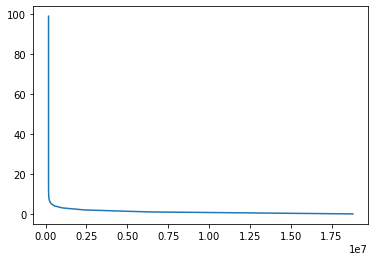

In [312]:
plt.plot(gradientDisentMultiple(iteration2, 0.002, W), r)